In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [48]:
df = pd.read_csv('/kaggle/input/spam-sms-classification-using-nlp/Spam_SMS.csv')
df.head()


,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


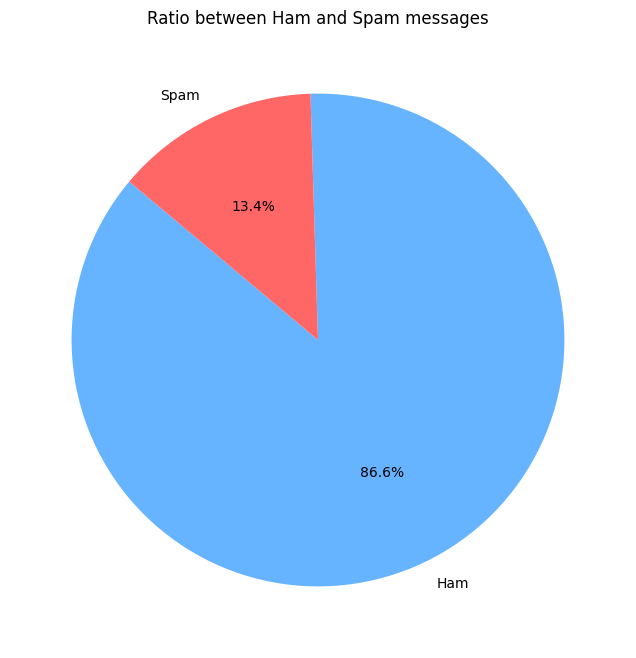

In [50]:
spam_counts = df['Class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(spam_counts, labels=['Ham', 'Spam'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff6666'])
plt.title("Ratio between Ham and Spam messages")
plt.show()


In [51]:
df.columns = ['label', 'message']

# Convert labels to binary (0 = ham, 1 = spam)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Basic text cleaning (optional, based on need)
df['message'] = df['message'].str.lower().str.replace(r'\W', ' ', regex=True).str.strip()


In [52]:
# Initialize vectorizer
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['message']).toarray()
y = df['label']


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Train model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [55]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 97.73%
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1447
           1       1.00      0.83      0.91       226

    accuracy                           0.98      1673
   macro avg       0.99      0.92      0.95      1673
weighted avg       0.98      0.98      0.98      1673



In [57]:
def predict_message(message):
    message_transformed = vectorizer.transform([message]).toarray()
    prediction = model.predict(message_transformed)
    return 'spam' if prediction[0] == 1 else 'ham'

def predict_messages(messages):
    predictions = {}
    for message in messages:
        prediction = predict_message(message)
        predictions[message] = prediction
    return predictions

In [56]:
test_messages = [
    "Hey, are we still on for lunch tomorrow?",  # ham
    "Congratulations! You've won a $1,000 Walmart gift card. Text WIN to 55555 now!",  # spam
    "Can you send me the report by end of the day?",  # ham
    "URGENT! Your account has been compromised. Reply STOP to unsubscribe.",  # spam
    "I'll pick you up around 6 pm. Let me know if you're running late.",  # ham
    "You have been selected for a free vacation! Call us now at 1-800-555-1234.",  # spam
    "Please review the attached document for next week's meeting.",  # ham
    "You’ve won a free cruise! Act now to claim your prize.",  # spam
    "Meeting rescheduled to 3 pm. See you there!",  # ham
    "This is not a drill! Text WINNER to 12345 and win $1000 instantly.",  # spam
]

predictions = predict_messages(test_messages)
for message, prediction in predictions.items():
    print(f"Message: {message}\nPrediction: {prediction}\n")


Message: Hey, are we still on for lunch tomorrow?
Prediction: ham

Message: Congratulations! You've won a $1,000 Walmart gift card. Text WIN to 55555 now!
Prediction: spam

Message: Can you send me the report by end of the day?
Prediction: ham

Message: URGENT! Your account has been compromised. Reply STOP to unsubscribe.
Prediction: spam

Message: I'll pick you up around 6 pm. Let me know if you're running late.
Prediction: ham

Message: You have been selected for a free vacation! Call us now at 1-800-555-1234.
Prediction: ham

Message: Please review the attached document for next week's meeting.
Prediction: ham

Message: You’ve won a free cruise! Act now to claim your prize.
Prediction: spam

Message: Meeting rescheduled to 3 pm. See you there!
Prediction: ham

Message: This is not a drill! Text WINNER to 12345 and win $1000 instantly.
Prediction: spam

